
# **Introdução**

Em meus casos de estudo mantenho a escrita no idioma inglês por ser o utilizado no Kaggle e os mantenho também em português devido ao fato da minha língua nativa ser o português brasileiro, assim podemos compartilhar mais conhecimento e experiências no Kaggle com nossos colegas brasileiros.

Obigado!!


Conforme dataset a análise da personalidade do cliente ajuda a empresa a adequaer o seu produto com base em seus clientes de diferentes tipos de segmentos de clientes. Por exemplo, em vez de gastar dinheiro para comercializar um novo produto para cada cliente no banco de dados da empresa, uma empresa pode analisar qual segmento de cliente tem maior probabilidade de comprar o produto e, em seguida, comercializar o produto apenas naquele segmento específico.

O caso em em estudo possui um dataset bem amplo, mas nós iremos dividi-lo em três partes, faremos três estudos indepedentes, pois há três caracateristicas bem distintas entre os três, uma classe de atributos poderá influênciar com seus dados em outra e poderá comprometer o resultado do algoritimo.

Numa eventual campanha de marketing poderá a empresa utilizar-se dos resultados dos três em conjunto para direcionar o tipo de produto, campanha e oferecer a melhor forma de compra a ele cada cliente.

Poderiamos utilizar também outro algoritimo, mas nesse caso vamos identificar os grupos dando continuidade ao estudo de caso da parte 1;

Nós teremos como base os atributos pessoais dos clientes que se relacionará com os outras três classes:

                    Parte 1 - clusters e Prophet;
                    Parte 2 -  Em quais campanhas de publicidade o cliente respondeu, ou não?
                    Parte 3 -  Formas utilizada para compras.

# Introduction

In my case studies I keep writing in English because it is used in Kaggle and I also keep them in Portuguese because my native language is Brazilian Portuguese, so we can share more knowledge and experiences in Kaggle with our Brazilian colleagues.

Thank you!!

According to dataset, the analysis of the customer's personality helps the company to adapt its product based on its customers from different types of customer segments. For example, instead of spending money to market a new product to each customer in the company's database, a company can analyze which customer segment is most likely to buy the product and then market the product only in that specific segment. .

The case under study has a very broad dataset, but we will divide it into three parts, we will do three independent studies, as there are three very distinct characteristics among the three, one attribute class may influence its data in another and may compromise the result of the algorithm.

In an eventual marketing campaign, the company may use the results of the three together to direct the type of product, campaign and offer each customer the best way to purchase.

We could also use another algorithm, but in this case we will identify the groups continuing the case study in part 1;

We will be based on the personal attributes of the customers that will relate to the other three classes:

                Part 1 - clusters and Prophet;
                Part 2 - Which advertising campaigns did the customer respond to, or not?
                Part 3 - Forms used for shopping.

# **Atributos**

# **People**


ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if customer complained in the last 2 years, 0 otherwise


# **Products => Part 1**
MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years


# **Promotion => Part 2**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Place => Part 3

NumWebPurchases: Number of purchases made through the company’s web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s web site in the last month Target

# **`Segunda Parte  Clientes x o cliente aceitou a oferta`**


# **`Second Party Customers x customer accepted the offer`**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
from sklearn.decomposition import PCA
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Vamos transforma a data de nascimento dos nossos clientes em idade em outra coluna e vamos excluir a coluna 'Year_Birth'.

Vamos trambém transformar a da de registro dos consumirores de objeto para date time 64;

Let's turn our clients' birthdate by age into another column and let's delete the 'Year_Birth' column.

Let's also transform the registration data of the object consumers to date time 64;

In [ ]:
from datetime import date
year = date.today().year
age= year - df['Year_Birth'] 
df['Age'] = age


df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

Vamos manter apenas os atributos que podem fazer relação direta entre consumidor e ofertas.

We will only keep the attributes that can make a direct relationship between consumers and offer.

In [ ]:
df = df.drop(columns=["ID", "Year_Birth","Recency",	"MntWines",	"MntFruits",	"MntMeatProducts",	"MntFishProducts",	"MntSweetProducts",	"MntGoldProds", "NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases",	"NumWebVisitsMonth", "Complain",	"Z_CostContact",	"Z_Revenue",	"Response"]) 

In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age
0,Graduation,Single,58138.0,0,0,2012-04-09,3,0,0,0,0,0,64
1,Graduation,Single,46344.0,1,1,2014-08-03,2,0,0,0,0,0,67
2,Graduation,Together,71613.0,0,0,2013-08-21,1,0,0,0,0,0,56
3,Graduation,Together,26646.0,1,0,2014-10-02,2,0,0,0,0,0,37
4,PhD,Married,58293.0,1,0,2014-01-19,5,0,0,0,0,0,40


# **Analisando e Tratando os Dados**
# Analyzing and Handling Data

In [ ]:
df.isna().sum(axis=0)

Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
Dt_Customer           0
NumDealsPurchases     0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
AcceptedCmp1          0
AcceptedCmp2          0
Age                   0
dtype: int64

In [ ]:
grafico = px.box(df, y='Income')
grafico.show()

In [ ]:
df.query("Income > 140000") 

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age
164,PhD,Married,157243.0,0,1,2014-01-03,15,0,0,0,0,0,48
617,PhD,Together,162397.0,1,1,2013-03-06,0,0,0,0,0,0,45
655,Graduation,Divorced,153924.0,0,0,2014-07-02,0,0,0,0,0,0,46
687,PhD,Married,160803.0,0,0,2012-04-08,15,0,0,0,0,0,39
1300,Master,Together,157733.0,1,0,2013-04-06,0,0,0,0,0,0,50
1653,Graduation,Together,157146.0,0,0,2013-04-29,0,0,0,0,0,0,44
2132,PhD,Married,156924.0,0,0,2013-08-29,0,0,0,0,0,0,72
2233,Graduation,Together,666666.0,1,0,2013-02-06,4,0,0,0,0,0,44


In [ ]:
df = df.drop([164,617,655,687,1300,1653,2132,2233])

In [ ]:
df.isnull().sum()

Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
Dt_Customer           0
NumDealsPurchases     0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
AcceptedCmp1          0
AcceptedCmp2          0
Age                   0
dtype: int64

In [ ]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

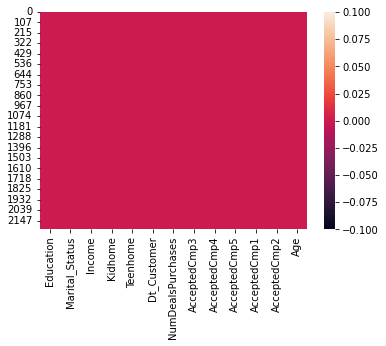

In [ ]:
sns.heatmap(df.isnull());

In [ ]:
grafico = px.box(df, y='Age')
grafico.show()

In [ ]:
df.loc[df['Age'] > 81]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age
192,2n Cycle,Divorced,36640.0,1,0,2013-09-26,1,0,0,0,0,0,121
239,2n Cycle,Single,60182.0,0,1,2014-05-17,1,0,0,0,0,0,128
339,PhD,Together,83532.0,0,0,2013-09-26,1,0,0,1,0,0,122


In [ ]:
df = df.drop([192,239,339])

# **Analise dos dados em gráficos**
# **Analysis of data in graphs**

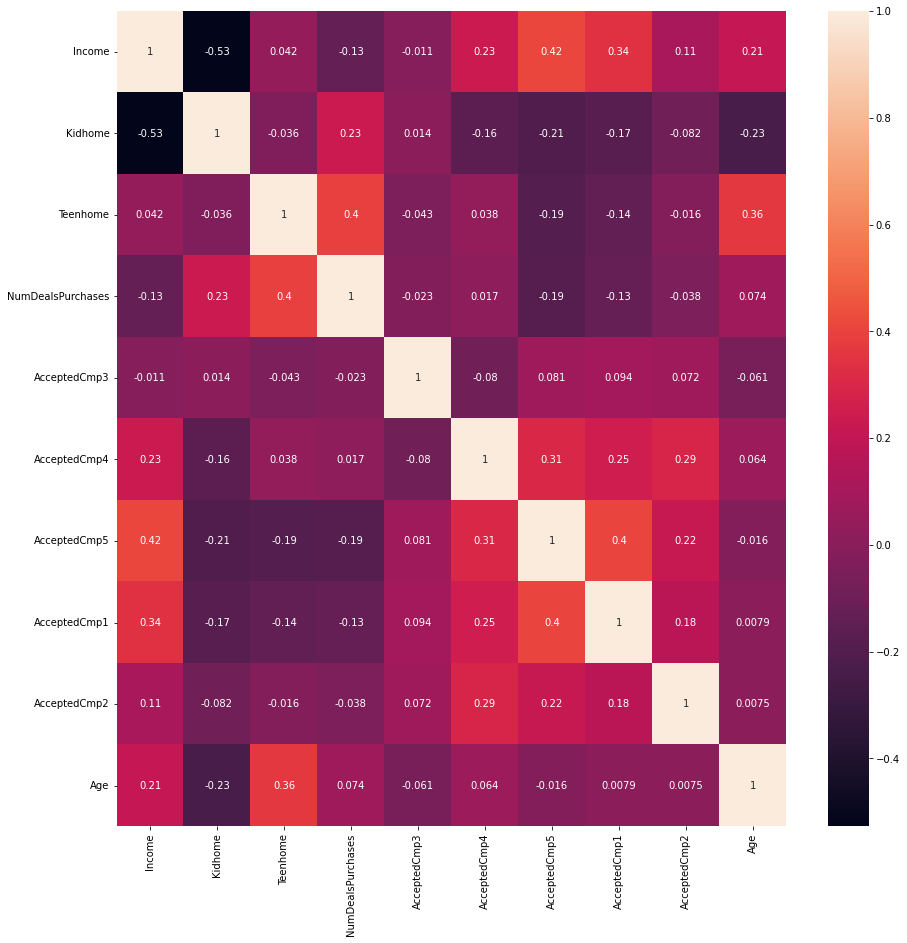

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot=True)
correlations.round(2);

É interessante observamos a correlação dos grupos com as ofertas, o estabelecimento pode verificar o que foi ofertado em determinado dia que atingiu determinado grupo, tem ofertas que atingiu o grupo com poder aquisitivo maior e tem oferta que atingiu os consumidores com crianças.


It is interesting to observe the correlation of the groups with the offers, the establishment can check what was offered on a given day that reached a certain group, there are offers that reached the group with greater purchasing power, and there are offers that reached consumers with children.

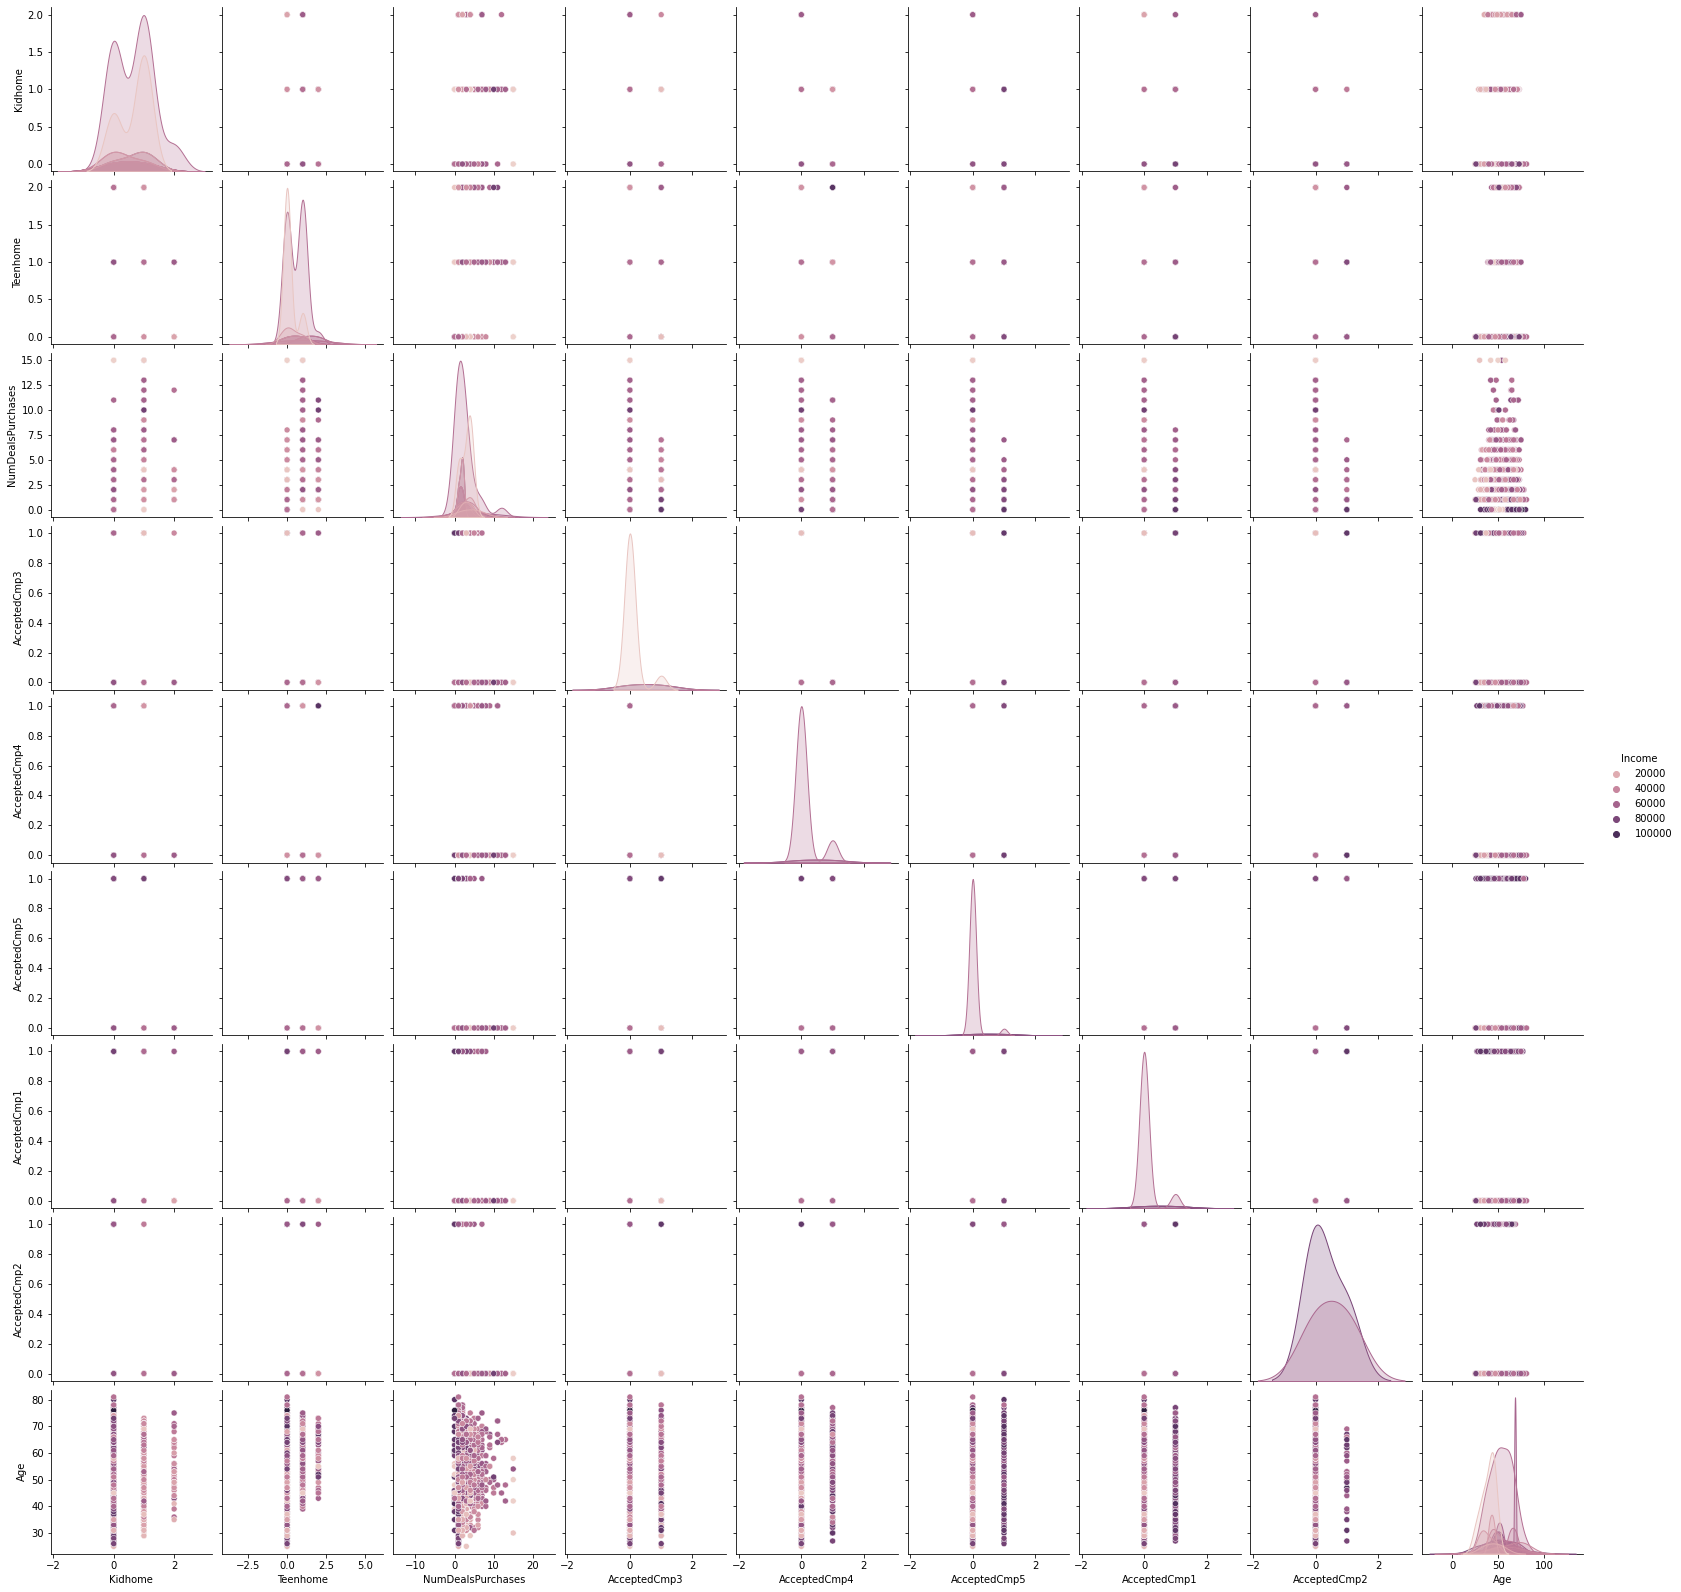

In [ ]:
Plot1 = ['Education',	'Marital_Status',	'Income',	'Kidhome',	'Teenhome',	'Dt_Customer',	'NumDealsPurchases',	'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Age']
sns.pairplot(df[Plot1], hue = 'Income')

Afim de ter uma análise entre crianças e adolecentes, vamos somar as duas colunas e obter apenas uma como jovens.


In order to have an analysis between children and adolescents, let's add the two columns together and get only one as young people.

In [ ]:
df['Young'] = df.apply(lambda x: x['Teenhome'] + x['Kidhome'], axis=1)
df = df.drop(columns=['Kidhome',	'Teenhome']) 
df.head(2)

,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Young
0,Graduation,Single,58138.0,2012-04-09,3,0,0,0,0,0,64,0
1,Graduation,Single,46344.0,2014-08-03,2,0,0,0,0,0,67,2


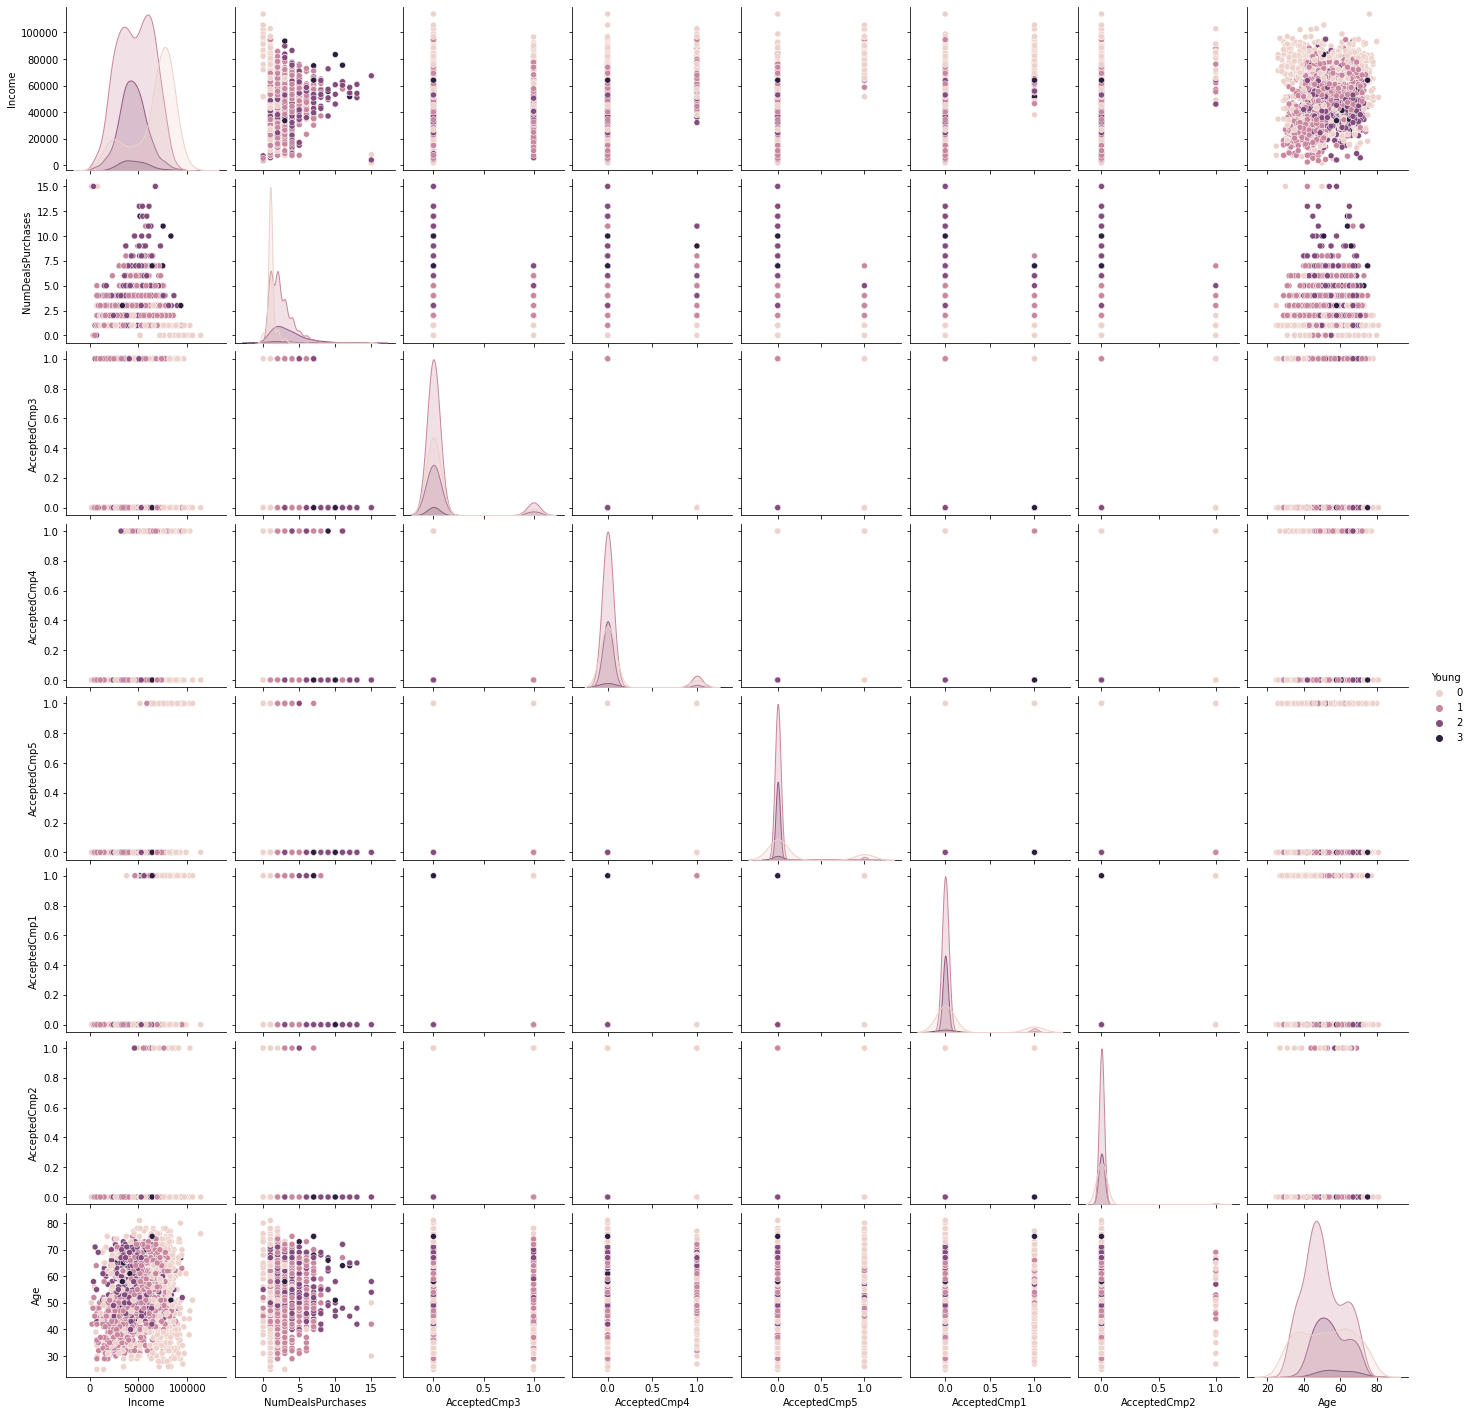

In [ ]:
Plot1 = ['Education',	'Marital_Status',	'Income',	'Dt_Customer',	'NumDealsPurchases',	'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Age', 'Young']
sns.pairplot(df[Plot1], hue = 'Young')

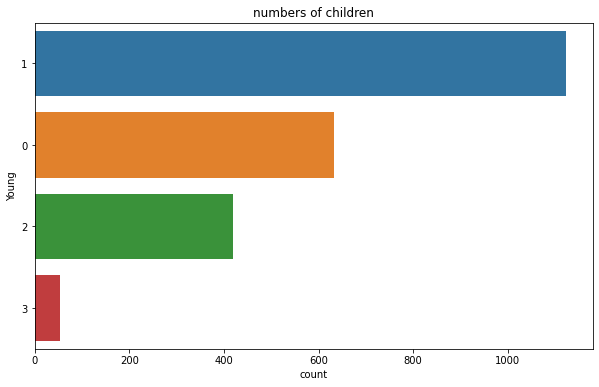

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Young", data=df, order=df["Young"].value_counts().index)
plt.title("numbers of children");

# **Pré Processamento**
# Pre-Processing

In [ ]:
mk = LabelEncoder()
df['Education'] = mk.fit_transform(df['Education'])
df['Marital_Status'] = mk.fit_transform(df['Marital_Status'])
df['Dt_Customer'] = mk.fit_transform(df['Dt_Customer'])

In [ ]:
df.head(2)

,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Young
0,2,4,58138.0,15,3,0,0,0,0,0,64,0
1,2,4,46344.0,635,2,0,0,0,0,0,67,2


In [ ]:
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df)

In [ ]:
type(df_scaled)

numpy.ndarray

In [ ]:
min(df_scaled[0]), max(df_scaled[0]) 

(-1.6435862793088722, 1.0157145572147253)

In [ ]:
df_scaled

array([[-0.3497775 ,  0.25155415,  0.31635257, ..., -0.11680139,
         1.01571456, -1.26627659],
       [-0.3497775 ,  0.25155415, -0.25626678, ..., -0.11680139,
         1.27201959,  1.39397838],
       [-0.3497775 ,  1.18142842,  0.97058741, ..., -0.11680139,
         0.33223448, -1.26627659],
       ...,
       [-0.3497775 , -1.60819441,  0.2601782 , ..., -0.11680139,
        -1.03472567, -1.26627659],
       [ 0.5412557 ,  1.18142842,  0.85561687, ..., -0.11680139,
         1.10114957,  0.06385089],
       [ 1.4322889 , -0.67832013,  0.0605334 , ..., -0.11680139,
         1.27201959,  1.39397838]])

In [ ]:
wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(df_scaled)            
  wcss_1.append(kmeans.inertia_)  

In [ ]:
print(wcss_1) 

[26748.0, 22843.4528877911, 20752.93358854061, 18887.6639170723, 17347.45643504221, 15698.102105611251, 14635.809705268457, 13636.576757076988, 12984.234313587705]


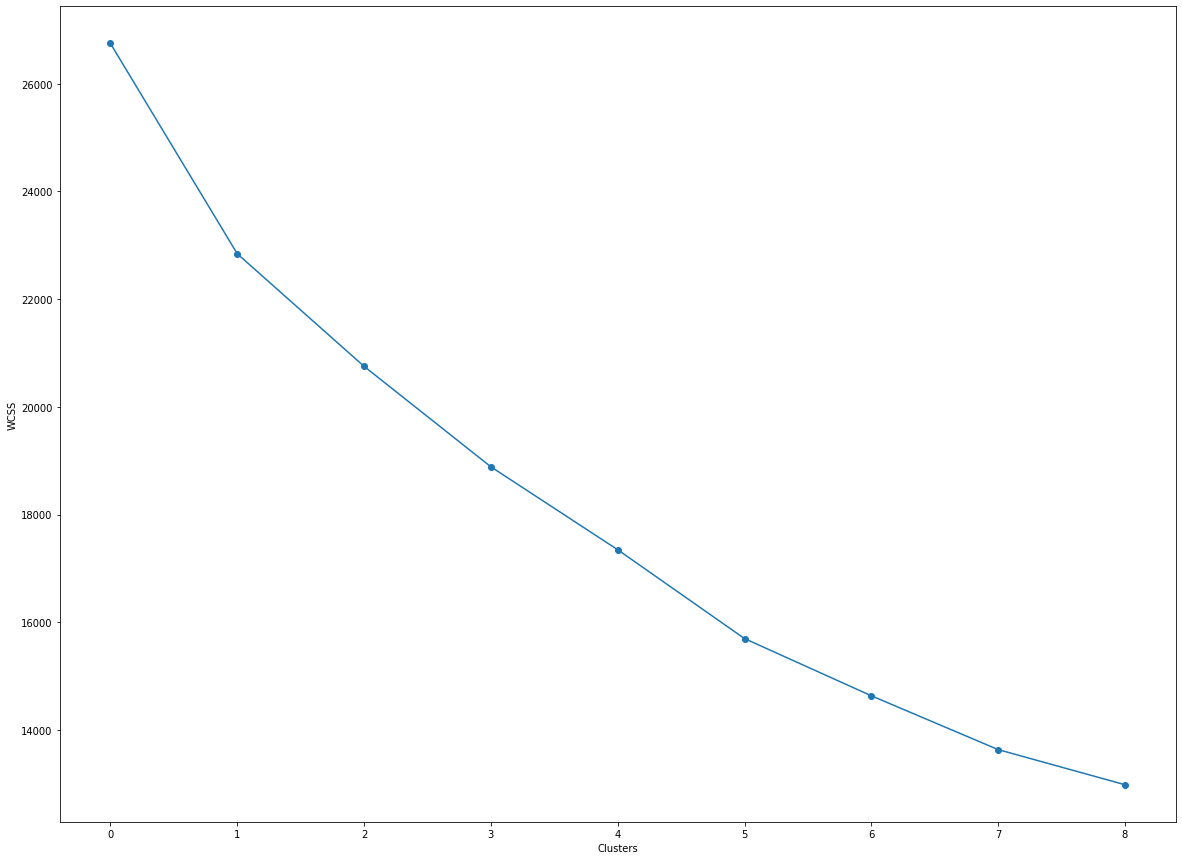

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(wcss_1, '-o',)                              
plt.xlabel('Clusters',)
plt.ylabel('WCSS');

In [ ]:
kmeans = KMeans(n_clusters=5)           
kmeans.fit(df_scaled)         
labels = kmeans.labels_

In [ ]:
labels, len(labels)  

(array([1, 2, 1, ..., 1, 1, 2], dtype=int32), 2229)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([697, 713, 575,  30, 214]))

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Young
0,-0.597784,0.042099,-0.875360,-0.068338,-0.261190,0.077320,-0.262787,-0.279954,-0.256965,-0.116801,-0.737603,-0.027750
1,0.350052,-0.035364,0.565456,0.297465,-0.421958,-0.135431,-0.039524,-0.279954,-0.262802,-0.116801,0.367822,-0.477155
2,0.277820,-0.012045,-0.194743,-0.318241,1.071175,-0.027041,-0.053376,-0.279954,-0.234503,-0.116801,0.418858,1.019229
3,0.184842,0.158567,0.943487,-0.064626,-0.327140,0.615362,2.500951,1.902826,1.499977,8.561542,0.064538,-0.601213
4,0.008301,-0.009158,1.358075,0.095638,-0.575727,0.185786,0.780402,2.330022,2.132347,-0.116801,0.042394,-0.974146


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Young
0,1.721664,3.774749,33592.806067,315.525108,1.824964,0.093257,0.005739,-9.714451e-16,1.434720e-03,2.255141e-17,43.477762,0.931133
1,2.785414,3.691445,63268.672344,385.312763,1.520337,0.037868,0.064516,-1.026956e-15,2.359224e-16,3.642919e-17,56.416550,0.593268
2,2.704348,3.716522,47611.187528,267.848696,4.349565,0.066087,0.060870,-4.718448e-16,6.956522e-03,-1.058181e-16,57.013913,1.718261
3,2.600000,3.900000,71054.833333,316.233333,1.700000,0.233333,0.733333,5.666667e-01,4.333333e-01,1.000000e+00,52.866667,0.500000
4,2.401869,3.719626,79593.921852,346.808411,1.228972,0.121495,0.280374,6.775701e-01,5.887850e-01,-6.245005e-17,52.607477,0.219626


In [ ]:
labels, len(labels)

(array([1, 2, 1, ..., 1, 1, 2], dtype=int32), 2229)

In [ ]:
df_mk_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1) 
df_mk_cluster.head()

,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Young,cluster
0,2.0,4.0,58138.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,1.0
1,2.0,4.0,46344.0,635.0,2.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,2.0
2,2.0,5.0,71613.0,367.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,1.0
3,2.0,5.0,26646.0,646.0,2.0,0.0,0.0,0.0,0.0,0.0,37.0,1.0,0.0
4,4.0,3.0,58293.0,504.0,5.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,2.0


findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling

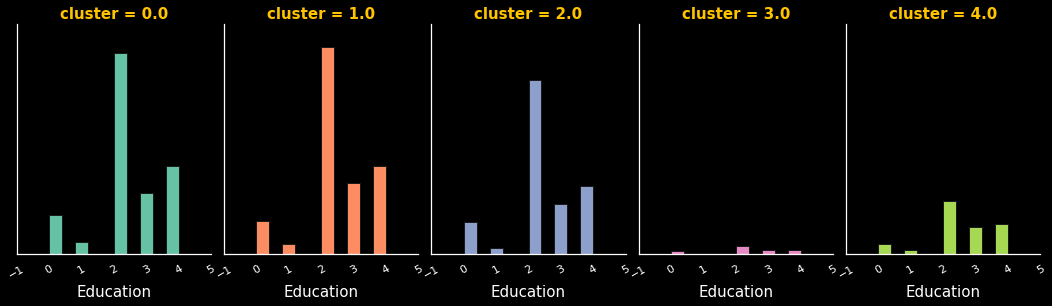

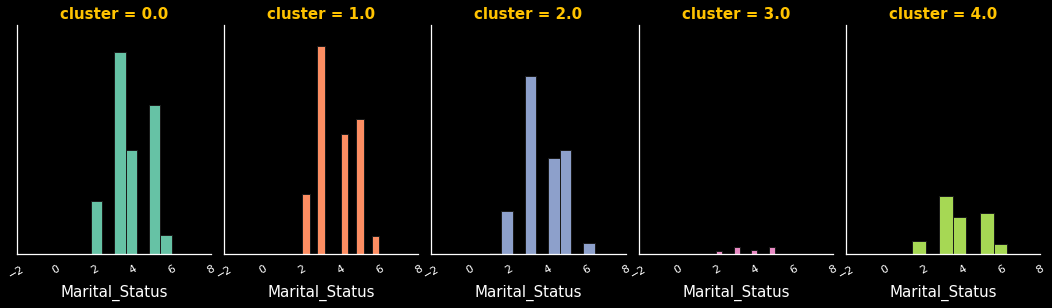

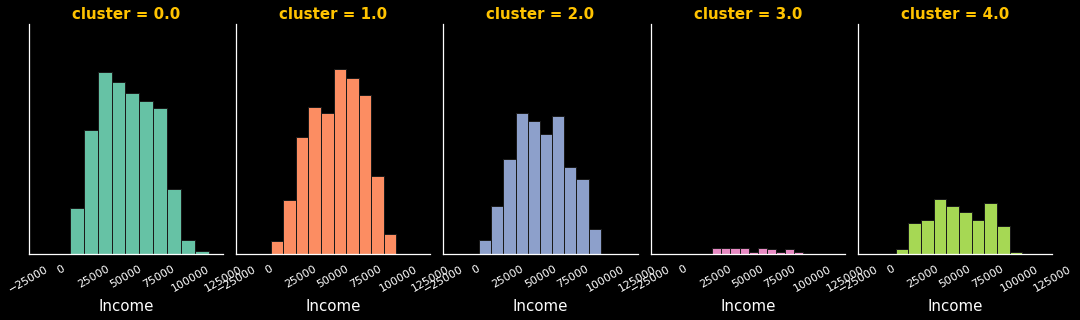

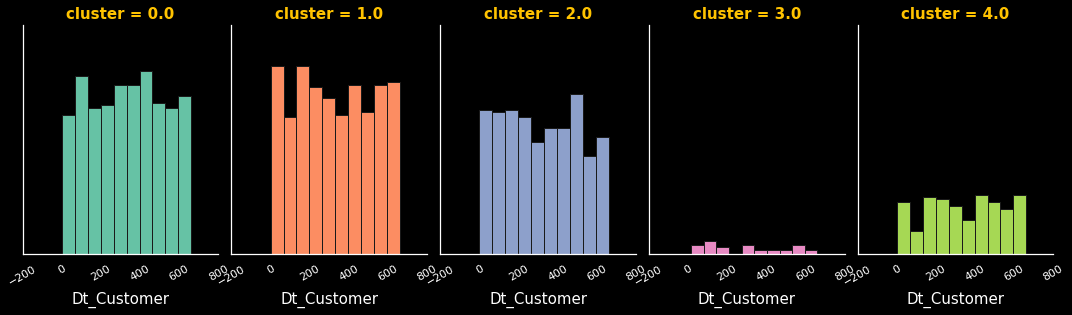

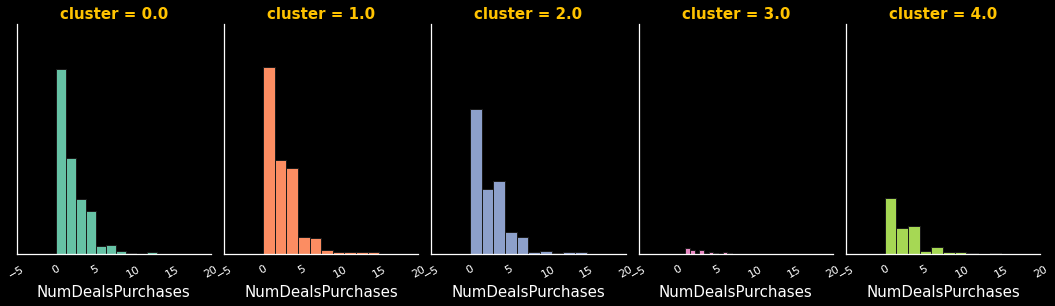

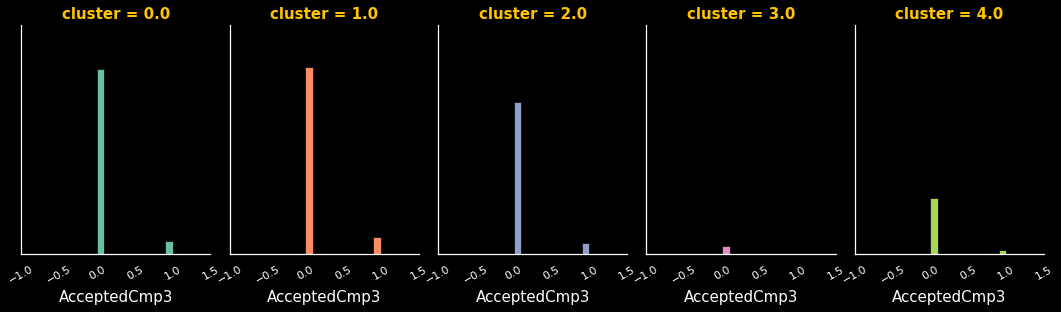

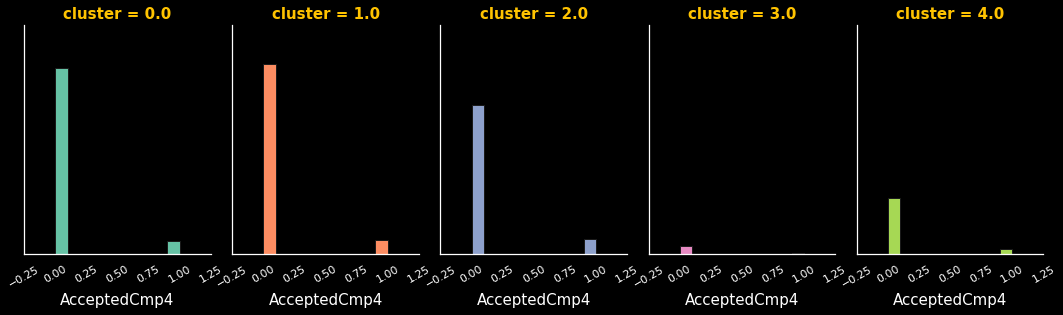

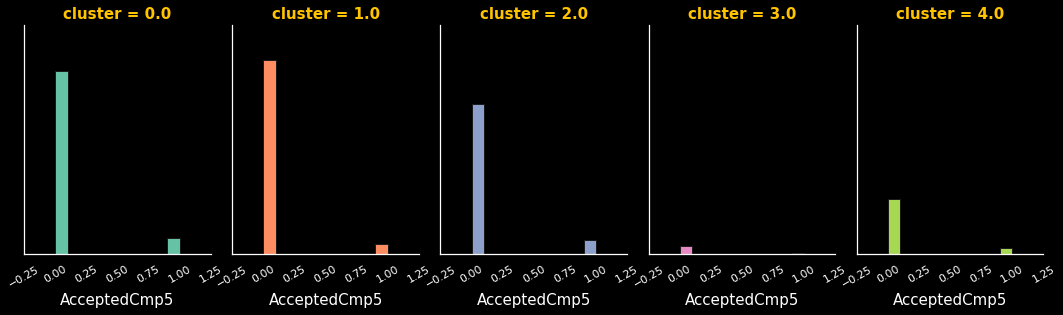

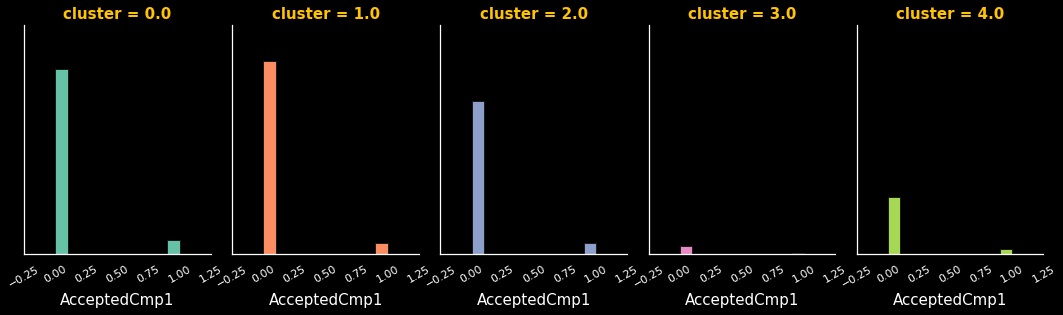

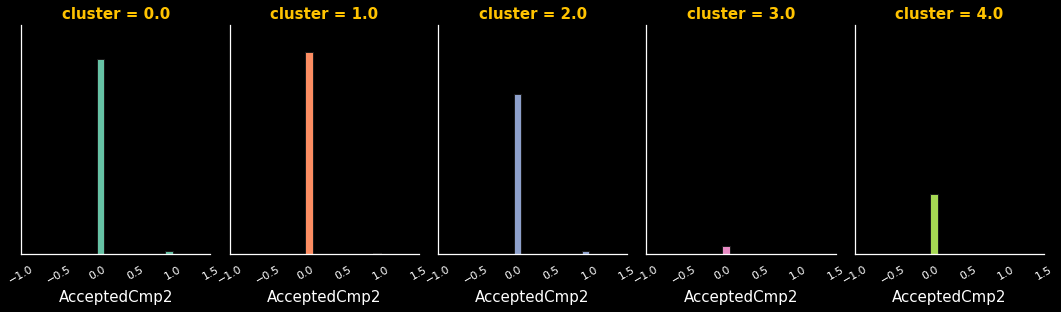

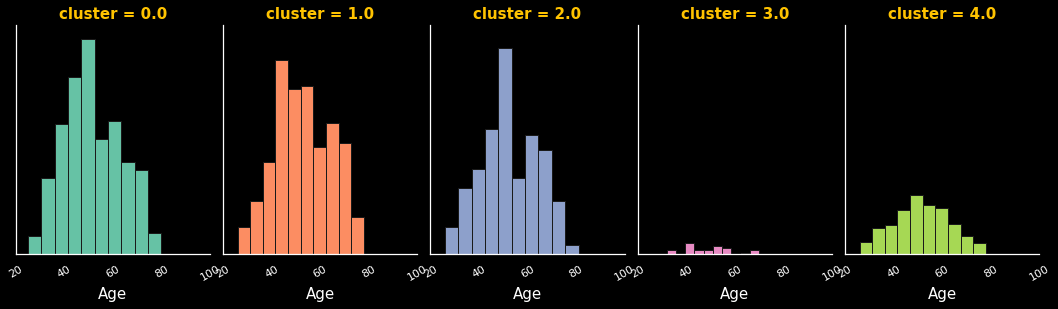

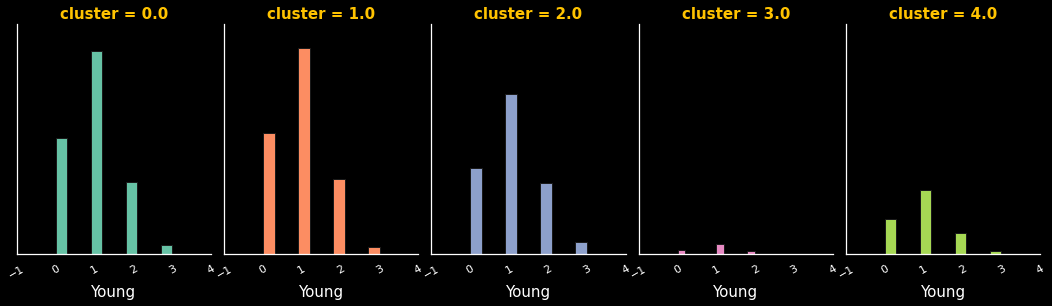

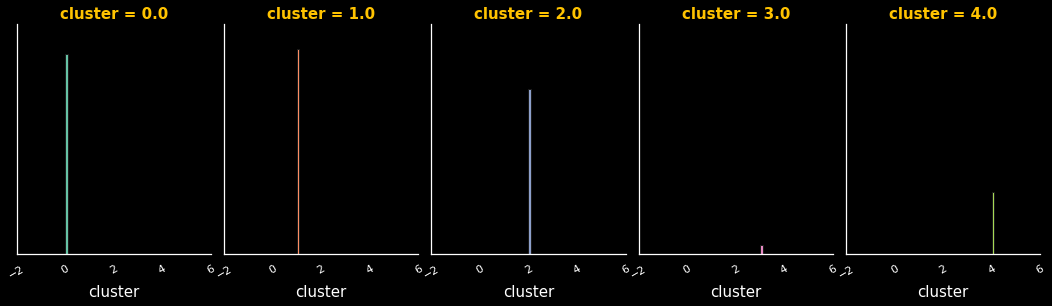

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
import matplotlib as mpl

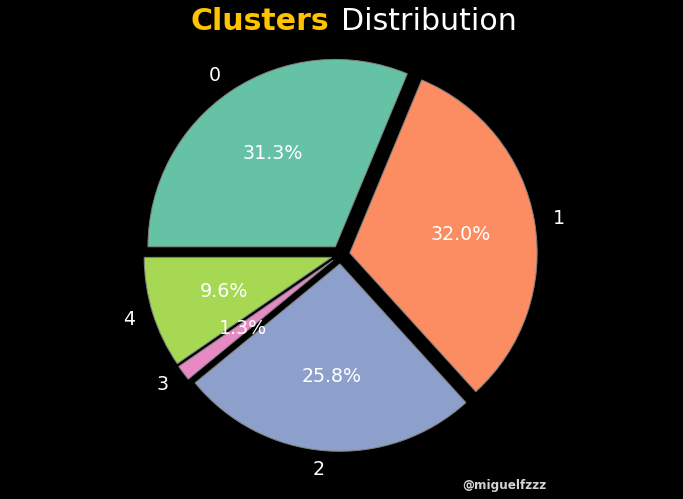

In [ ]:

clusters_count = df_mk_cluster['cluster'].value_counts()                      
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                                
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "0", 
        "1", 
        "2", 
        "3",
        "4"
        ]


plt.figure(figsize=(12,8))

mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]

plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')


plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-0.0, 1.2, "Distribution", size=30, color="white")


plt.text(1.1, -1.25, "@miguelfzzz", fontsize=12, ha="right", color='lightgray', fontweight="bold")

plt.show();